In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')
file = '/content/drive/MyDrive/restaurant_recommendation_dataset (1).xlsx'

Mounted at /content/drive


In [3]:
df = pd.read_excel(file)
df.head()


,user_id,restaurant_id,restaurant_name,cuisine_type,rating,order_amount,popularity_score,user_age,delivery_time,previous_orders,discount_applied
0,15796,1174,Golden Dragon Chinese,Chinese,3.0,50.81,0.373,43.2,29.70,9,22.64
1,861,1928,Seafood Shack,Seafood,3.8,21.77,0.824,24.2,43.14,15,18.56
2,38159,1349,Mediterranean Delights,Mediterranean,3.2,72.21,0.528,31.5,27.75,10,34.92
3,44733,3708,Biryani Point,Indian,5.0,31.99,0.895,26.6,36.97,9,11.46
4,11285,3361,Grill House BBQ,BBQ,3.6,15.09,0.711,33.5,28.43,8,18.12


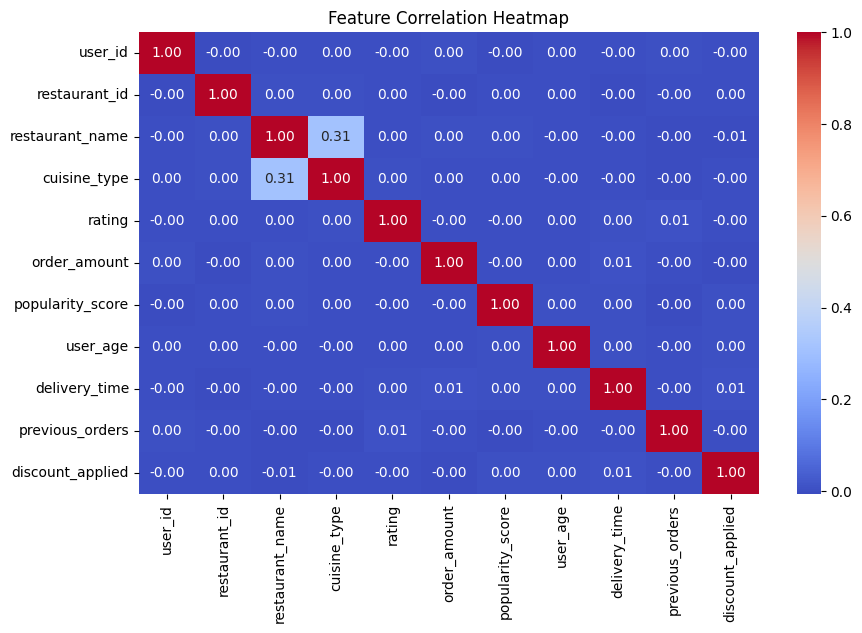

In [24]:
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [4]:
df.tail()

,user_id,restaurant_id,restaurant_name,cuisine_type,rating,order_amount,popularity_score,user_age,delivery_time,previous_orders,discount_applied
99995,10647,2403,Grill House BBQ,BBQ,5.0,19.33,0.123,23.2,37.35,8,19.01
99996,13800,2099,Seafood Shack,Seafood,2.6,34.86,0.831,40.7,32.83,12,11.61
99997,47131,2990,Biryani Point,Indian,2.5,70.28,0.664,18.4,41.02,7,3.48
99998,49654,922,Dessert Haven,Dessert,2.5,59.38,0.873,46.4,39.63,12,16.36
99999,12929,2347,Biryani Point,Indian,3.3,87.45,0.838,32.7,18.41,7,39.82


In [5]:
df.describe()

,user_id,restaurant_id,rating,order_amount,popularity_score,user_age,delivery_time,previous_orders,discount_applied
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,24935.663570,2505.567050,3.745231,52.494254,0.597508,30.570822,30.288484,9.996830,20.044960
std,14406.960108,1442.137166,0.899857,27.419559,0.196338,9.058529,9.415634,3.160763,11.524116
min,1.000000,1.000000,1.000000,5.000000,0.000000,18.000000,15.000000,0.000000,0.000000
25%,12487.750000,1256.000000,3.100000,28.690000,0.464000,23.200000,23.270000,8.000000,10.070000
50%,24793.500000,2513.000000,3.800000,52.530000,0.600000,30.000000,30.000000,10.000000,20.110000
75%,37382.250000,3752.000000,4.500000,76.260000,0.735000,36.800000,36.720000,12.000000,30.040000
max,49999.000000,4999.000000,5.000000,100.000000,1.000000,70.000000,60.000000,25.000000,40.000000


In [6]:
df.shape

(100000, 11)

In [7]:
print(df.head())
print(df.info())

# Handle missing values (if any)
df = df.fillna(0)

features = ["user_id", "restaurant_id",	"restaurant_name",	"cuisine_type",	"rating",	"order_amount",	"popularity_score",	"user_age",	"delivery_time",	"previous_orders",	"discount_applied"]

target = "popularity_score"

   user_id  restaurant_id         restaurant_name   cuisine_type  rating  \
0    15796           1174   Golden Dragon Chinese        Chinese     3.0   
1      861           1928           Seafood Shack        Seafood     3.8   
2    38159           1349  Mediterranean Delights  Mediterranean     3.2   
3    44733           3708           Biryani Point         Indian     5.0   
4    11285           3361         Grill House BBQ            BBQ     3.6   

   order_amount  popularity_score  user_age  delivery_time  previous_orders  \
0         50.81             0.373      43.2          29.70                9   
1         21.77             0.824      24.2          43.14               15   
2         72.21             0.528      31.5          27.75               10   
3         31.99             0.895      26.6          36.97                9   
4         15.09             0.711      33.5          28.43                8   

   discount_applied  
0             22.64  
1             18.56  
2 

In [8]:
# Encode categorical variables
df["restaurant_name"] = LabelEncoder().fit_transform(df["restaurant_name"])
df["cuisine_type"] = LabelEncoder().fit_transform(df["cuisine_type"])


In [9]:
df.corr()

,user_id,restaurant_id,restaurant_name,cuisine_type,rating,order_amount,popularity_score,user_age,delivery_time,previous_orders,discount_applied
user_id,1.000000,-0.004665,-0.000769,0.001077,-0.001893,0.004174,-0.003917,0.000571,-0.001048,0.001886,-0.000312
restaurant_id,-0.004665,1.000000,0.001613,0.004413,0.000022,-0.003305,0.000675,0.000504,-0.003885,-0.000813,0.001179
restaurant_name,-0.000769,0.001613,1.000000,0.310517,0.000638,0.004481,0.002694,-0.002327,-0.000799,-0.003608,-0.006476
cuisine_type,0.001077,0.004413,0.310517,1.000000,0.001768,0.000235,0.000767,-0.001664,-0.001590,-0.004779,-0.000604
rating,-0.001893,0.000022,0.000638,0.001768,1.000000,-0.001082,-0.000721,0.001018,0.003270,0.005748,-0.001960
order_amount,0.004174,-0.003305,0.004481,0.000235,-0.001082,1.000000,-0.000366,0.000441,0.005776,-0.000942,-0.002573
popularity_score,-0.003917,0.000675,0.002694,0.000767,-0.000721,-0.000366,1.000000,0.003035,0.003071,-0.003529,0.001400
user_age,0.000571,0.000504,-0.002327,-0.001664,0.001018,0.000441,0.003035,1.000000,0.004333,-0.000186,0.003982
delivery_time,-0.001048,-0.003885,-0.000799,-0.001590,0.003270,0.005776,0.003071,0.004333,1.000000,-0.001360,0.008542
previous_orders,0.001886,-0.000813,-0.003608,-0.004779,0.005748,-0.000942,-0.003529,-0.000186,-0.001360,1.000000,-0.000438


100000 100000


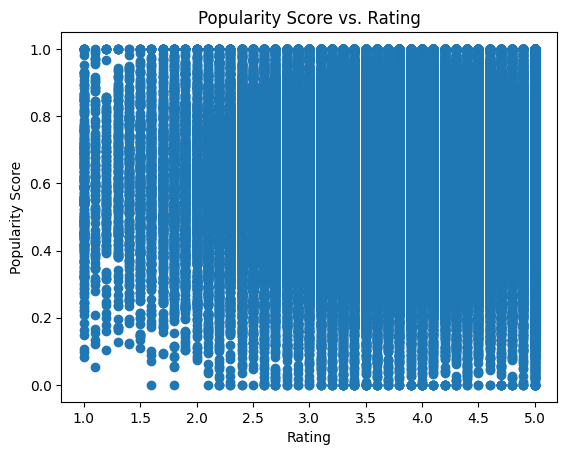

In [32]:

X = df['rating']
y = df[target]

print(len(X), len(y))

# Creating a scatter plot
plt.scatter(X, y)
plt.xlabel('Rating')  # Rating is on the X-axis
plt.ylabel('Popularity Score')  # Popularity Score is on the Y-axis
plt.title('Popularity Score vs. Rating')
plt.show()


In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit & transform X_train, then transform X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)  # Check first 5 scaled values


[[ 0.72559416]
 [-0.49507379]
 [ 1.39141304]
 ...
 [ 0.61462435]
 [-0.38410398]
 [ 0.05977528]]


In [64]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use same scaler for test data


In [70]:
import statsmodels.formula.api as smf
#linear regression fitting
model_v = smf.ols('popularity_score ~ rating + discount_applied', data=df).fit()


In [69]:
model_wv = smf.ols('rating ~ order_amount + previous_orders', data=df).fit()


In [67]:
print(model_v.rsquared, '\n' ,model_v.rsquared_adj)

2.4747235878308516e-06 
 -1.75258269341505e-05


In [68]:
print(model_wv.rsquared, '\n' ,model_wv.rsquared_adj)

3.420129290720997e-05 
 1.420137693564083e-05


<Axes: xlabel='popularity_score', ylabel='Count'>

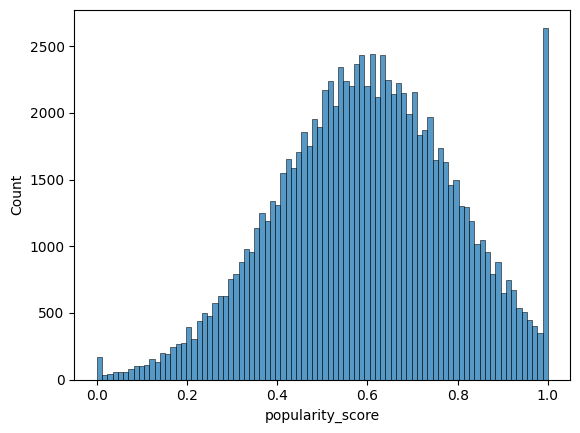

In [22]:
#Creating a Histplot
sns.histplot(df['popularity_score'])

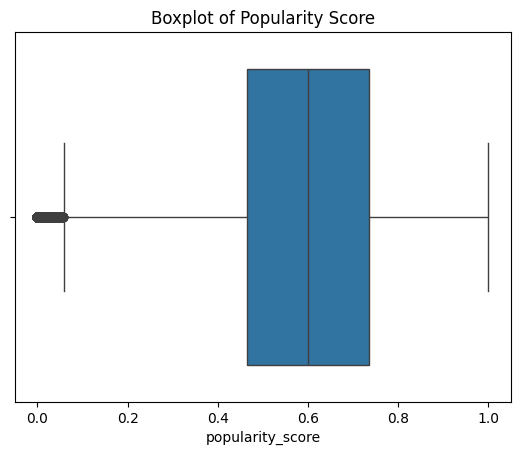

In [34]:
#creating boxplot

sns.boxplot(x=df['popularity_score'])
plt.title('Boxplot of Popularity Score')
plt.show()
